In [37]:
import cv2 as cv
import util as ut
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage.metrics import structural_similarity as ssim

img_gray = io.imread('Verkehrsschilderkenner/30_test_cut.jpg', as_gray=True)
template = io.imread('Verkehrsschilderkenner/50_ref.jpg').astype('uint8')
template_gray = ut.rgb2gray(template)


#TODO´s:
* add contrast adjustment in template matching, white in sign resembles black more
* create another routine for finding elipses

* maybe use a pretrained Neural Network

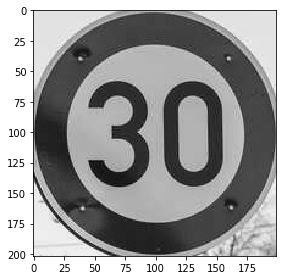

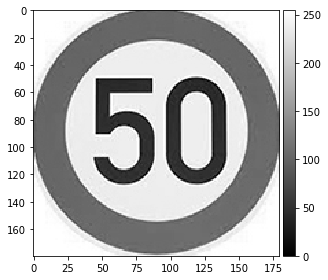

In [38]:
ut.printImage(img_gray)
ut.printImage(template_gray)


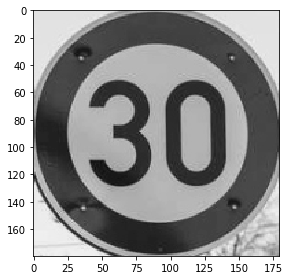

In [39]:
img_gray = cv.resize(img_gray, template_gray.shape[::-1], interpolation = cv.INTER_AREA)
ut.printImage(img_gray)


In [40]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

print(mse(img_gray, template_gray))
print(ssim(img_gray, template_gray))


4224.211728395062
0.5197455742600212


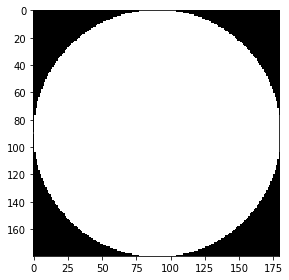

In [41]:
mask = np.zeros((template_gray.shape[0], template_gray.shape[1], 3), dtype=np.uint8)
cv.circle(mask, (int(template_gray.shape[0]/2), int(template_gray.shape[0]/2)), int(template_gray.shape[0]/2), (255, 255, 255), thickness=-1)
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
ut.printImage(mask)


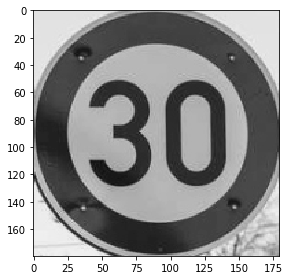

In [42]:
ut.printImage(img_gray)
new_img = img_gray
#new_img = cv.bitwise_and(img_gray, img_gray, mask=mask)
#new_img = ((new_img - new_img.min()) * (255 / new_img.max())).astype('uint8')
#new_img = np.where((255 - new_img) < 100,255,new_img) # Expected results
#ut.printImage(new_img)




In [43]:
print(mse(new_img, template_gray))
print(ssim(new_img, template_gray))


4224.211728395062
0.5197455742600212


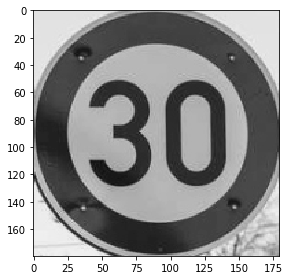

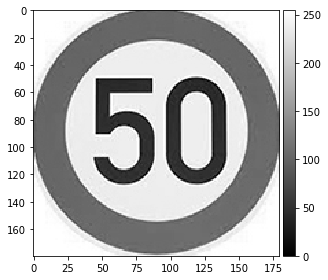

[[0.71905255]]


In [44]:
w, h = template_gray.shape[::-1]
res = cv.matchTemplate(new_img.astype('uint8'),template_gray.astype('uint8'),cv.TM_CCOEFF_NORMED, mask=mask)
#res = cv.matchTemplate(new_img.astype('uint8'),template_gray.astype('uint8'),cv.TM_CCORR_NORMED, mask=mask)
#res = cv.matchTemplate(new_img.astype('uint8'),template_gray.astype('uint8'),cv.TM_SQDIFF_NORMED, mask=mask)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    print("True")
ut.printImage(img_gray)
ut.printImage(template_gray)

print(res)
